# INTRODUCTION
1. Read datas
1. Poverty rate of each state
1. Most common 15 Name or Surname of killed people
1. High school graduation rate of the population that is older than 25 in states
1. Percentage of state's population according to races that are black,white,native american, asian and hispanic
1. High school graduation rate vs Poverty rate of each state
1. Kill properties
    * Manner of death
    * Kill weapon
    * Age of killed people
    * Race of killed people
    * Most dangerous cities
    * Most dangerous states
    * Having mental ilness or not for killed people
    * Threat types
    * Flee types
    * Having body cameras or not for police
1. Race rates according to states in kill data 
1. Kill numbers from states in kill data
1. Plotly Visualization Tutorial: https://www.kaggle.com/kanncaa1/plotly-tutorial-for-beginners
<br>
<br>
Plot Contents:
* [Bar Plot](#1)
* [Point Plot](#2)
* [Joint Plot](#3)
* [Pie Chart](#4)
* [Lm Plot](#5)
* [Kde Plot](#6)
* [Violin Plot](#7)
* [Heatmap](#8)
* [Box Plot](#9)
* [Swarm Plot](#10)
* [Pair Plot](#11)
* [Count Plot](#12)
    


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

MedianHouseholdIncome2015.csv
PercentOver25CompletedHighSchool.csv
PercentagePeopleBelowPovertyLevel.csv
PoliceKillingsUS.csv
ShareRaceByCity.csv



In [2]:
# Read datas
median_house_hold_in_come = pd.read_csv('../input/MedianHouseholdIncome2015.csv', encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv('../input/PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv('../input/PercentOver25CompletedHighSchool.csv', encoding="windows-1252")
share_race_city = pd.read_csv('../input/ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('../input/PoliceKillingsUS.csv', encoding="windows-1252")

In [3]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [8]:
percentage_people_below_poverty_level.describe()

,Geographic Area,City,poverty_rate
count,29329,29329,29329
unique,51,24255,771
top,PA,Franklin city,0
freq,1762,16,1464


In [9]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area    29329 non-null object
City               29329 non-null object
poverty_rate       29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB


In [11]:
percentage_people_below_poverty_level.poverty_rate.value_counts()

0       1464
-        201
7.4      129
6.7      129
10       128
10.9     128
6.3      126
4.4      126
8.3      125
11.5     125
7.9      123
5.9      122
11.1     122
10.2     122
8.6      122
8.7      122
14.3     121
12.8     121
8.8      121
13.5     120
8.5      120
9.1      120
11.2     118
16       118
15.4     118
10.8     118
9.3      118
7.6      117
7.3      117
8        117
        ... 
64         1
73         1
55.5       1
84.7       1
92.9       1
86.1       1
68.6       1
67.2       1
67.5       1
76.3       1
93.4       1
90.9       1
69.1       1
73.7       1
93.5       1
56.1       1
87.8       1
89         1
69.7       1
71.1       1
58.6       1
78.5       1
70.6       1
83         1
74.2       1
81.8       1
73.8       1
0.1        1
56.3       1
88.4       1
Name: poverty_rate, Length: 771, dtype: int64

In [12]:
percentage_people_below_poverty_level['Geographic Area'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [14]:
percentage_people_below_poverty_level['Geographic Area'].describe()

count     29329
unique       51
top          PA
freq       1762
Name: Geographic Area, dtype: object

<a id="1"></a> 
## Bar Plot

Text(0.5,1,'Poverty Rate Given States')

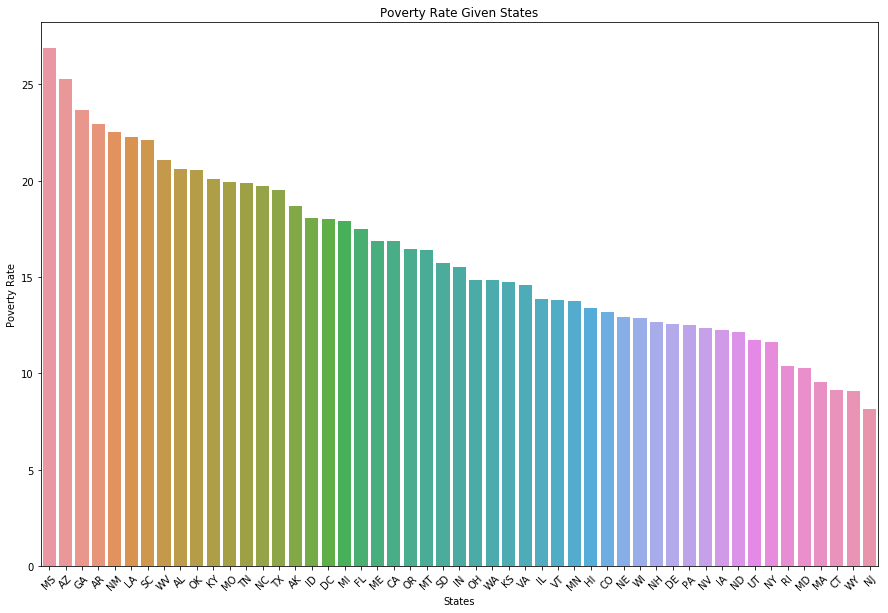

In [15]:
# Poverty rate of each state
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace = True)
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)
area_list = list(percentage_people_below_poverty_level['Geographic Area'].unique())
area_poverty_ratio = []
for i in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']==i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)
data = pd.DataFrame({'area_list': area_list,'area_poverty_ratio':area_poverty_ratio})
new_index = (data['area_poverty_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_poverty_ratio'])
plt.xticks(rotation= 45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')

In [16]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [17]:
# kill.name.value_counts()
["ali", "haydar"]

['ali', 'haydar']

Text(0.5,1,'Most common 15 Name or Surname of killed people')

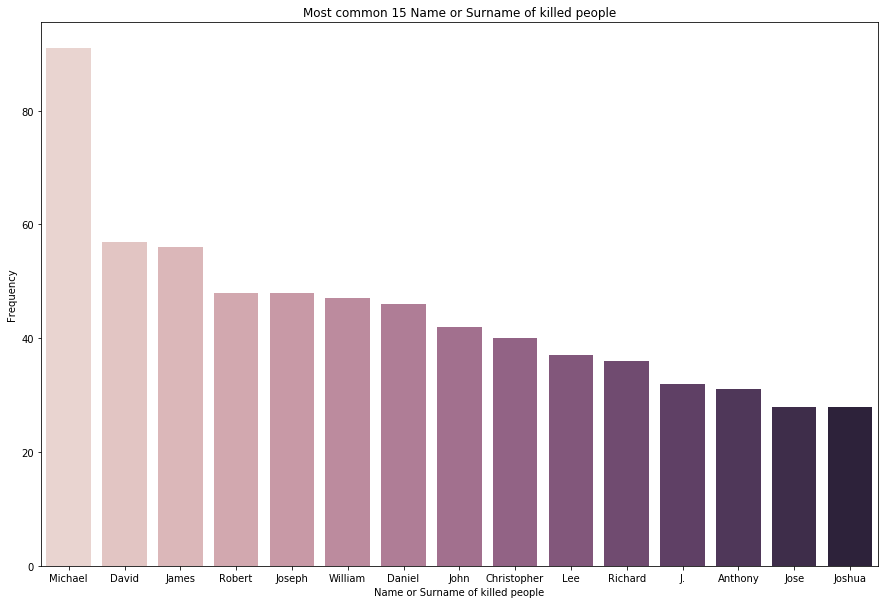

In [18]:
# Most common 15 Name or Surname of killed people
separate = kill.name[kill.name != 'TK TK'].str.split() 
a,b = zip(*separate)                    
name_list = a+b                         
name_count = Counter(name_list)         
most_common_names = name_count.most_common(15)  
x,y = zip(*most_common_names)
x,y = list(x),list(y)
# 
plt.figure(figsize=(15,10))
ax= sns.barplot(x=x, y=y,palette = sns.cubehelix_palette(len(x)))
plt.xlabel('Name or Surname of killed people')
plt.ylabel('Frequency')
plt.title('Most common 15 Name or Surname of killed people')

In [19]:
percent_over_25_completed_highSchool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [20]:
percent_over_25_completed_highSchool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area         29329 non-null object
City                    29329 non-null object
percent_completed_hs    29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB


In [21]:
percent_over_25_completed_highSchool.percent_completed_hs.value_counts()

100     1301
-        197
91.7     170
92.9     169
92.5     168
91.3     163
89.3     162
93.8     161
93.2     160
92.1     159
91.9     158
92.7     158
92.2     157
93.4     156
90.9     156
89.7     153
93.9     150
91.1     150
89.4     150
90.2     149
91.6     148
91.5     147
88.1     146
93.6     146
92.6     146
90.4     145
89.1     145
94.3     144
89.9     142
92.4     142
        ... 
33         1
16.1       1
43.9       1
29.2       1
26.7       1
15.3       1
20         1
42.7       1
43.7       1
50.5       1
26         1
20.6       1
22.2       1
8.1        1
13.7       1
35.6       1
18.3       1
17.7       1
38.2       1
56.2       1
15.5       1
16.4       1
30.5       1
7.9        1
30.6       1
38         1
23.3       1
17.2       1
25.9       1
12.9       1
Name: percent_completed_hs, Length: 728, dtype: int64

Text(0.5,1,"Percentage of Given State's Population Above 25 that Has Graduated High School")

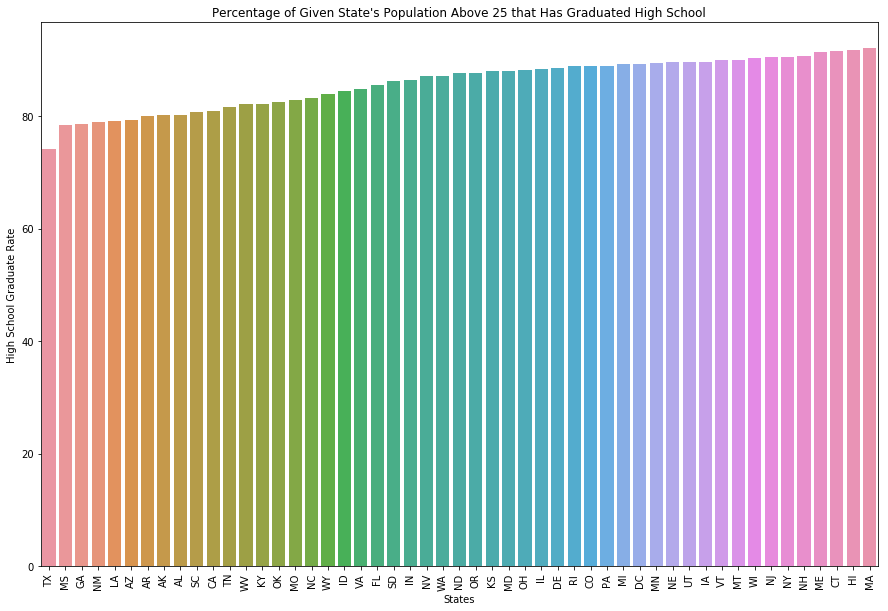

In [22]:
# High school graduation rate of the population that is older than 25 in states
percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'],0.0,inplace = True)
percent_over_25_completed_highSchool.percent_completed_hs = percent_over_25_completed_highSchool.percent_completed_hs.astype(float)
area_list = list(percent_over_25_completed_highSchool['Geographic Area'].unique())
area_highschool = []
for i in area_list:
    x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area']==i]
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)
# sorting
data = pd.DataFrame({'area_list': area_list,'area_highschool_ratio':area_highschool})
new_index = (data['area_highschool_ratio'].sort_values(ascending=True)).index.values
sorted_data2 = data.reindex(new_index)
# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data2['area_list'], y=sorted_data2['area_highschool_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('States')
plt.ylabel('High School Graduate Rate')
plt.title("Percentage of Given State's Population Above 25 that Has Graduated High School")

In [23]:
share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [24]:
share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
Geographic area          29268 non-null object
City                     29268 non-null object
share_white              29268 non-null object
share_black              29268 non-null object
share_native_american    29268 non-null object
share_asian              29268 non-null object
share_hispanic           29268 non-null object
dtypes: object(7)
memory usage: 1.6+ MB


[Text(0,0.5,'States'),
 Text(0.5,0,'Percentage of Races'),
 Text(0.5,1,"Percentage of State's Population According to Races ")]

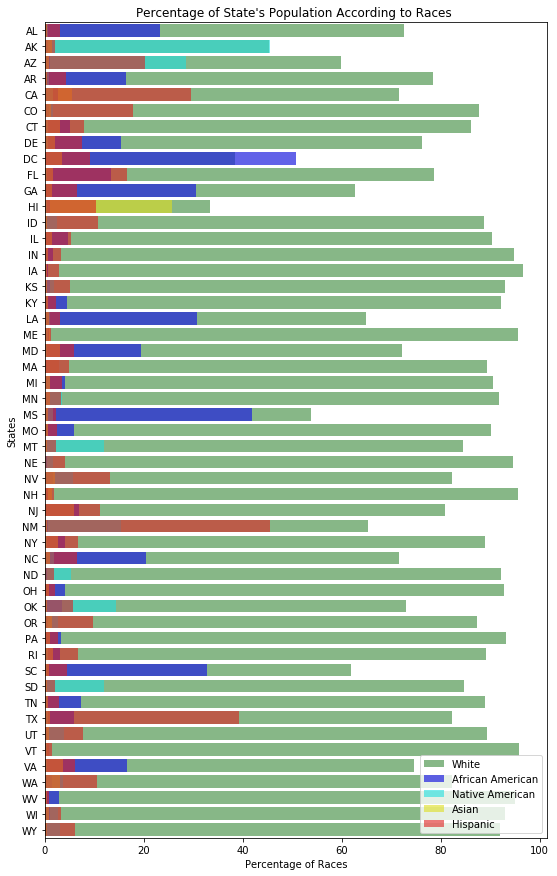

In [25]:
# Percentage of state's population according to races that are black,white,native american, asian and hispanic
share_race_city.replace(['-'],0.0,inplace = True)
share_race_city.replace(['(X)'],0.0,inplace = True)
share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']] = share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float)
area_list = list(share_race_city['Geographic area'].unique())
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []
for i in area_list:
    x = share_race_city[share_race_city['Geographic area']==i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black) / len(x))
    share_native_american.append(sum(x.share_native_american) / len(x))
    share_asian.append(sum(x.share_asian) / len(x))
    share_hispanic.append(sum(x.share_hispanic) / len(x))

# visualization
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=share_white,y=area_list,color='green',alpha = 0.5,label='White' )
sns.barplot(x=share_black,y=area_list,color='blue',alpha = 0.7,label='African American')
sns.barplot(x=share_native_american,y=area_list,color='cyan',alpha = 0.6,label='Native American')
sns.barplot(x=share_asian,y=area_list,color='yellow',alpha = 0.6,label='Asian')
sns.barplot(x=share_hispanic,y=area_list,color='red',alpha = 0.6,label='Hispanic')

ax.legend(loc='lower right',frameon = True)     # legendlarin gorunurlugu
ax.set(xlabel='Percentage of Races', ylabel='States',title = "Percentage of State's Population According to Races ")

<a id="2"></a>
## Point Plot

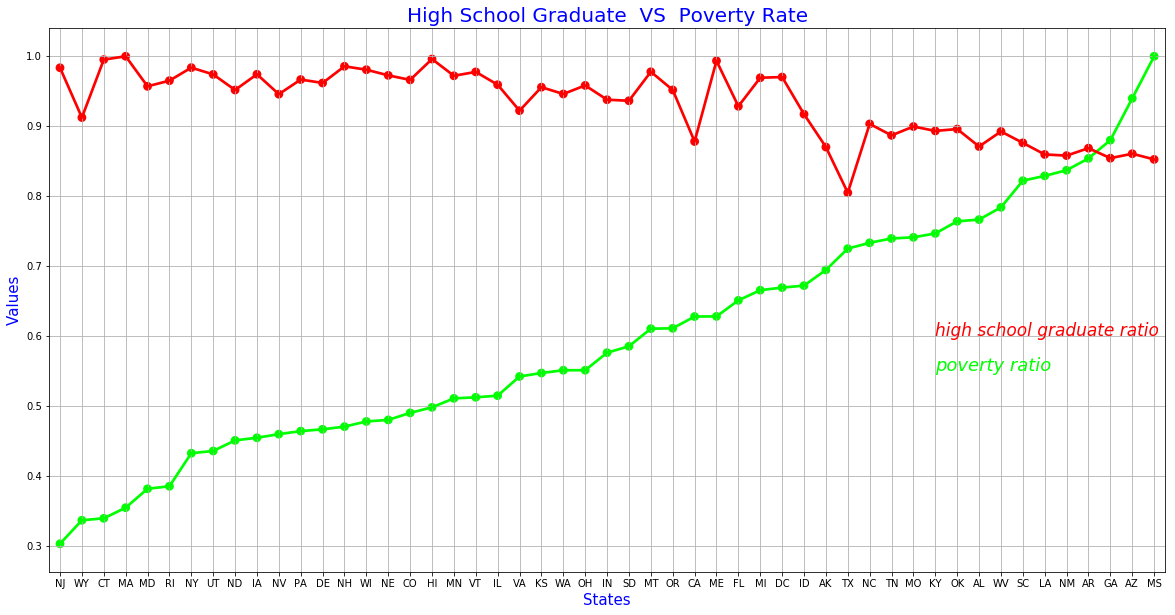

In [26]:
# high school graduation rate vs Poverty rate of each state
sorted_data['area_poverty_ratio'] = sorted_data['area_poverty_ratio']/max( sorted_data['area_poverty_ratio'])
sorted_data2['area_highschool_ratio'] = sorted_data2['area_highschool_ratio']/max( sorted_data2['area_highschool_ratio'])
data = pd.concat([sorted_data,sorted_data2['area_highschool_ratio']],axis=1)
data.sort_values('area_poverty_ratio',inplace=True)

# visualize
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='area_list',y='area_poverty_ratio',data=data,color='lime',alpha=0.8)
sns.pointplot(x='area_list',y='area_highschool_ratio',data=data,color='red',alpha=0.8)
plt.text(40,0.6,'high school graduate ratio',color='red',fontsize = 17,style = 'italic')
plt.text(40,0.55,'poverty ratio',color='lime',fontsize = 18,style = 'italic')
plt.xlabel('States',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.title('High School Graduate  VS  Poverty Rate',fontsize = 20,color='blue')
plt.grid()


In [27]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


<a id="3"></a> 
## Joint Plot

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


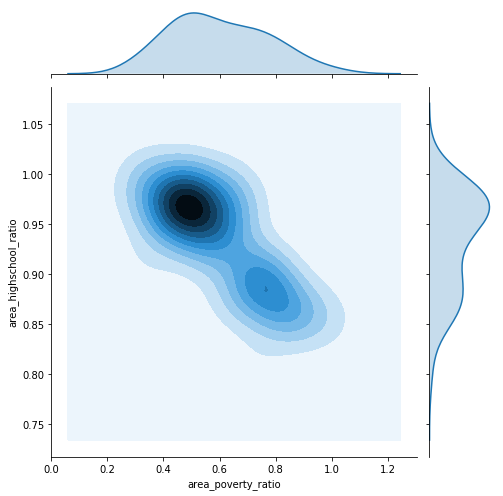

In [28]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# joint kernel density
# pearsonr= if it is 1, there is positive correlation and if it is, -1 there is negative correlation.
# If it is zero, there is no correlation between variables
# Show the joint distribution using kernel density estimation 
g = sns.jointplot(data.area_poverty_ratio, data.area_highschool_ratio, kind="kde", size=7)
plt.savefig('graph.png')
plt.show()

In [29]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


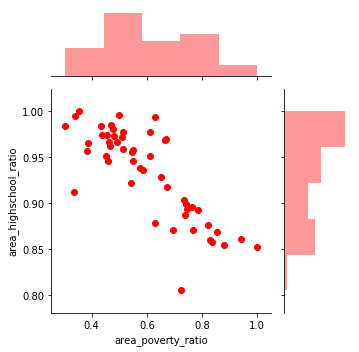

In [30]:
# you can change parameters of joint plot
# kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }
# Different usage of parameters but same plot with previous one
g = sns.jointplot("area_poverty_ratio", "area_highschool_ratio", data=data,size=5, ratio=3, color="r")

<a id="4"></a> 
## Pie Chart

In [31]:
kill.race.head(15)

0     A
1     W
2     H
3     W
4     H
5     W
6     H
7     W
8     W
9     B
10    W
11    B
12    B
13    W
14    B
Name: race, dtype: object

In [32]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

Text(0.5,1,'Killed People According to Races')

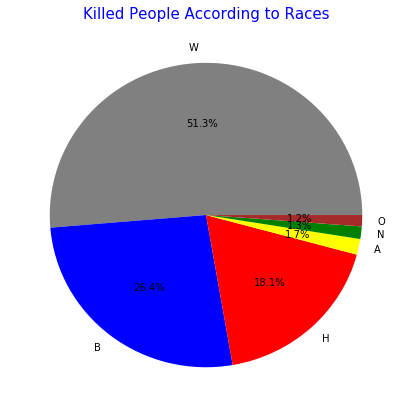

In [33]:
# Race rates according in kill data 
kill.race.dropna(inplace = True)
labels = kill.race.value_counts().index
colors = ['grey','blue','red','yellow','green','brown']
explode = [0,0,0,0,0,0]
sizes = kill.race.value_counts().values

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Killed People According to Races',color = 'blue',fontsize = 15)

<a id="5"></a> 
## Lm Plot

In [34]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


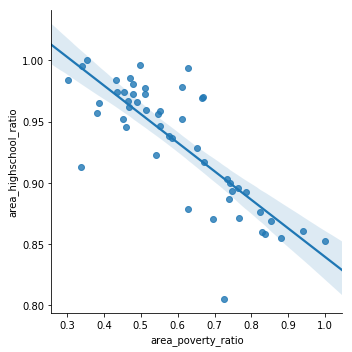

In [35]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# lmplot 
# Show the results of a linear regression within each dataset
sns.lmplot(x="area_poverty_ratio", y="area_highschool_ratio", data=data)
plt.show()

<a id="6"></a> 
## Kde Plot

In [36]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


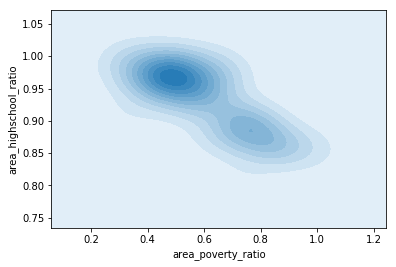

In [37]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# cubehelix plot
sns.kdeplot(data.area_poverty_ratio, data.area_highschool_ratio, shade=True, cut=3)
plt.show()

<a id="7"></a> 
## Violin Plot

In [38]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


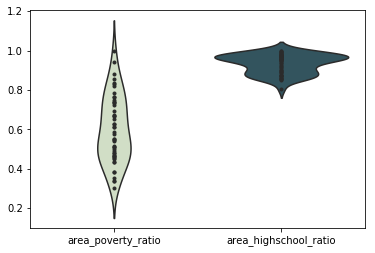

In [39]:
# Show each distribution with both violins and points
# Use cubehelix to get a custom sequential palette
pal = sns.cubehelix_palette(2, rot=-.5, dark=.3)
sns.violinplot(data=data, palette=pal, inner="points")
plt.show()

<a id="8"></a> 
## Heatmap

In [40]:
data.corr()

,area_poverty_ratio,area_highschool_ratio
area_poverty_ratio,1.000000,-0.805761
area_highschool_ratio,-0.805761,1.000000


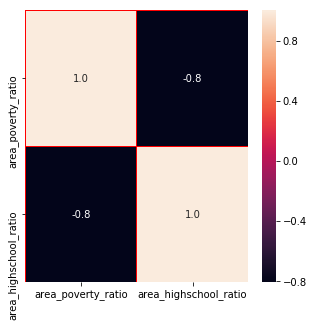

In [41]:
#correlation map
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(data.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

<a id="9"></a> 
## Box Plot

In [42]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [43]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

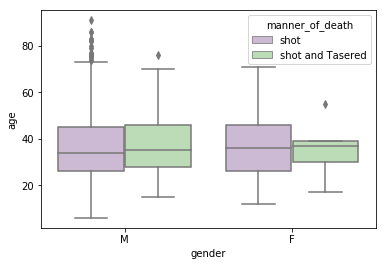

In [44]:
# manner of death(olum sekli) : ates edilerek, ates edilerek ve sok tabancasiyla
# gender cinsiyet
# age: yas
# Plot the orbital period with horizontal boxes
sns.boxplot(x="gender", y="age", hue="manner_of_death", data=kill, palette="PRGn")
plt.show()

<a id="10"></a> 
## Swarm Plot

In [45]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


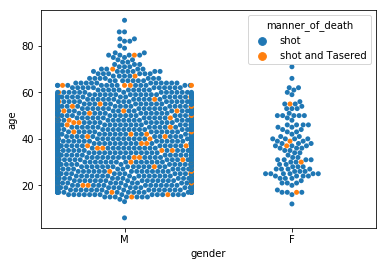

In [46]:
# swarm plot
# manner of death(olum sekli) : ates edilerek, ates edilerek ve sok tabancasiyla
# gender cinsiyet
# age: yas
sns.swarmplot(x="gender", y="age",hue="manner_of_death", data=kill)
plt.show()

<a id="11"></a> 
## Pair Plot

In [47]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


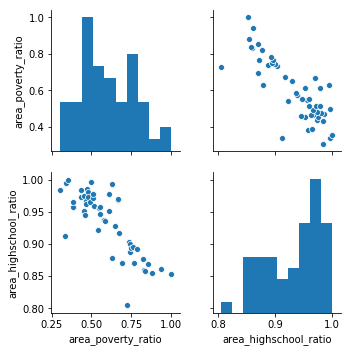

In [48]:
# pair plot
sns.pairplot(data)
plt.show()

<a id="12"></a> 
## Count Plot

In [49]:
kill.gender.value_counts()

SyntaxError: invalid syntax (<ipython-input-49-a5d5b61aa8a6>, line 1)

In [ ]:
kill.head()

In [ ]:
# kill properties
# Manner of death
sns.countplot(kill.gender)
#sns.countplot(kill.manner_of_death)
plt.title("gender",color = 'blue',fontsize=15)

In [ ]:
# kill weapon
armed = kill.armed.value_counts()
#print(armed)
plt.figure(figsize=(10,7))
sns.barplot(x=armed[:7].index,y=armed[:7].values)
plt.ylabel('Number of Weapon')
plt.xlabel('Weapon Types')
plt.title('Kill weapon',color = 'blue',fontsize=15)

In [ ]:
# age of killed people
above25 =['above25' if i >= 25 else 'below25' for i in kill.age]
df = pd.DataFrame({'age':above25})
sns.countplot(x=df.age)
plt.ylabel('Number of Killed People')
plt.title('Age of killed people',color = 'blue',fontsize=15)

In [ ]:
# Race of killed people
sns.countplot(data=kill, x='race')
plt.title('Race of killed people',color = 'blue',fontsize=15)

In [ ]:
# Most dangerous cities
city = kill.city.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=city[:12].index,y=city[:12].values)
plt.xticks(rotation=45)
plt.title('Most dangerous cities',color = 'blue',fontsize=15)

In [ ]:
# most dangerous states
state = kill.state.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=state[:20].index,y=state[:20].values)
plt.title('Most dangerous state',color = 'blue',fontsize=15)

In [ ]:
# Having mental ilness or not for killed people
sns.countplot(kill.signs_of_mental_illness)
plt.xlabel('Mental illness')
plt.ylabel('Number of Mental illness')
plt.title('Having mental illness or not',color = 'blue', fontsize = 15)

In [ ]:
# Threat types
sns.countplot(kill.threat_level)
plt.xlabel('Threat Types')
plt.title('Threat types',color = 'blue', fontsize = 15)

In [ ]:
# Flee types
sns.countplot(kill.flee)
plt.xlabel('Flee Types')
plt.title('Flee types',color = 'blue', fontsize = 15)

In [ ]:
# Having body cameras or not for police
sns.countplot(kill.body_camera)
plt.xlabel('Having Body Cameras')
plt.title('Having body cameras or not on Police',color = 'blue',fontsize = 15)

In [ ]:
# Kill numbers from states in kill data
sta = kill.state.value_counts().index[:10]
sns.barplot(x=sta,y = kill.state.value_counts().values[:10])
plt.title('Kill Numbers from States',color = 'blue',fontsize=15)

# CONCLUSION
**If you have any question, I will be happy to hear it!!!**
Thanks